<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
# type your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Read the data

Load the csv file and print the first five observations.

In [2]:
# type your code here
df=pd.read_csv('diamond_data.csv')

In [3]:
df.head()

,carat,cut,color,depth,table,price,x,y,z
0,0.30,Good,F,61.1,61.0,682,4.29,4.32,2.63
1,0.72,Ideal,H,62.0,56.0,2443,5.80,5.74,3.58
2,1.71,Premium,J,62.9,58.0,8848,7.64,7.58,4.79
3,1.01,Premium,E,59.2,59.0,7287,6.67,6.60,3.93
4,0.52,Ideal,D,62.7,56.0,1720,5.17,5.14,3.23


In [7]:
df.color.value_counts()

G    317
E    281
F    274
H    244
D    206
I    141
J     84
Name: color, dtype: int64

In [4]:
df.dtypes

carat    float64
cut       object
color     object
depth    float64
table    float64
price      int64
x        float64
y        float64
z        float64
dtype: object

In [5]:
df.color.value_counts()

G    317
E    281
F    274
H    244
D    206
I    141
J     84
Name: color, dtype: int64

In [6]:
df.cut.value_counts()

Ideal        611
Premium      389
Very Good    358
Good         148
Fair          41
Name: cut, dtype: int64

Our objective is to predict the price of the diamond.

**The data definition is as follows:** <br>

**carat**: Weight of the diamond

**cut**: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color**: Diamond color

**depth**: Total depth percentage (it is calculated as: 2 * z / (x + y))

**table**: Width of top of the diamond relative to the widest point 

**price**: Price of a diamond in US dollars (target/dependent variable)

**x**: Length of a diamond in mm

**y**: Width of a diamond in mm

**z**: Depth of a diamond in mm

In [14]:
df_num=df.select_dtypes(include=['int64','float'])

In [22]:
df_cat=df.select_dtypes(include='object')

In [25]:
df_cat.head()

,cut,color
0,Good,F
1,Ideal,H
2,Premium,J
3,Premium,E
4,Ideal,D


In [29]:
for col in df_cat.columns:
    df_cat[col] = labelEncoder.fit_transform(df_cat[col])
df_cat.head()

<ipython-input-29-dfb11c18ab84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col] = labelEncoder.fit_transform(df_cat[col])


,cut,color
0,1,2
1,2,4
2,3,6
3,3,1
4,2,0


In [37]:
x=pd.concat([df_num,df_cat],axis=1)

In [39]:
x.head()

,carat,depth,table,price,x,y,z,cut,color
0,0.30,61.1,61.0,682,4.29,4.32,2.63,1,2
1,0.72,62.0,56.0,2443,5.80,5.74,3.58,2,4
2,1.71,62.9,58.0,8848,7.64,7.58,4.79,3,6
3,1.01,59.2,59.0,7287,6.67,6.60,3.93,3,1
4,0.52,62.7,56.0,1720,5.17,5.14,3.23,2,0


### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is the variable representing the width of a diamond skewed? If yes, apply an appropriate technique to make the distribution less skewed </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
x['y'].skew()

0.4383878452014628

In [41]:
x['y'].describe()

count    1547.000000
mean        5.714460
std         1.116477
min         3.880000
25%         4.720000
50%         5.660000
75%         6.520000
max         9.010000
Name: y, dtype: float64

C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


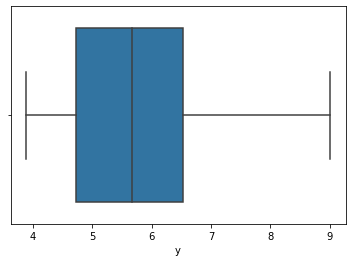

In [43]:
sns.boxplot(x['y'])
plt.show()

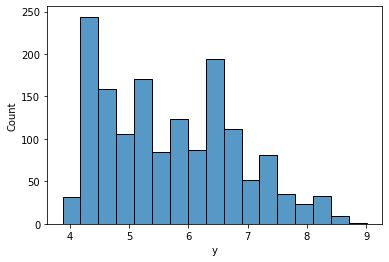

In [44]:
sns.histplot(x['y'])
plt.show()

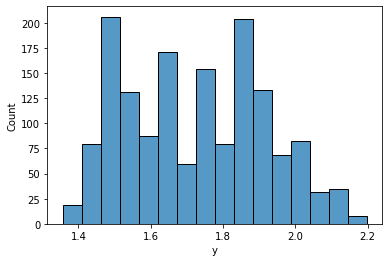

In [51]:
sns.histplot(np.log(x['y']))
plt.show()

In [ ]:
#Data is Right skewed , so applying Log Transform

In [45]:
from scipy.stats import shapiro
shapiro(df['y'])[1]
#P-value not less than 0.05 ,so it is skewed

3.0852279321256664e-22

In [20]:
np.sqrt(df['price']).describe()

count    1547.000000
mean       55.544530
std        29.224016
min        18.083141
25%        30.298515
50%        47.968740
75%        72.027767
max       137.124031
Name: price, dtype: float64

In [22]:
np.log(df['price']).describe()

count    1547.000000
mean        7.769473
std         1.027801
min         5.789960
25%         6.822197
50%         7.741099
75%         8.554103
max         9.841772
Name: price, dtype: float64

In [55]:
x['price']=np.sqrt(df['price'])

In [53]:
x['y']=np.sqrt(x['y'])

In [57]:
x['depth']=np.sqrt(x['depth'])

In [58]:
x['table']=np.sqrt(x['table'])

In [28]:
from sklearn.preprocessing import LabelEncoder
labelEncoder=LabelEncoder()

In [59]:
x.describe()

,carat,depth,table,price,x,y,z,cut,color
count,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000
mean,0.791325,7.858358,7.577843,7.211096,5.713594,2.379305,3.528203,2.565611,2.563025
std,0.475814,0.091649,0.146630,1.883328,1.126730,0.231086,0.693149,1.029353,1.709990
min,0.230000,7.389181,7.211103,4.252428,3.860000,1.969772,2.310000,0.000000,0.000000
25%,0.400000,7.816649,7.483315,5.504409,4.705000,2.172556,2.910000,2.000000,1.000000
50%,0.700000,7.867655,7.549834,6.925947,5.640000,2.379075,3.500000,2.000000,3.000000
75%,1.035000,7.905694,7.681146,8.486917,6.535000,2.553429,4.030000,3.000000,4.000000
max,2.660000,8.473488,8.366600,11.709997,9.080000,3.001666,5.540000,4.000000,6.000000


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [62]:
x.head()

,carat,depth,table,price,x,y,z,cut,color
0,0.30,7.816649,7.810250,5.110296,4.29,2.078461,2.63,1,2
1,0.72,7.874008,7.483315,7.030413,5.80,2.395830,3.58,2,4
2,1.71,7.930952,7.615773,9.698650,7.64,2.753180,4.79,3,6
3,1.01,7.694154,7.681146,9.239260,6.67,2.569047,3.93,3,1
4,0.52,7.918333,7.483315,6.439944,5.17,2.267157,3.23,2,0


In [65]:
X=x.drop('price',axis=1)
y=x['price']

In [75]:
from sklearn.metrics import mean_squared_error

In [84]:
x.var()

carat    0.226399
depth    0.008400
table    0.021500
price    3.546924
x        1.269522
y        0.053401
z        0.480456
cut      1.059567
color    2.924065
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a full model and check whether the errors have a serial correlation or not</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [83]:
# type your code here
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size = 0.20, random_state = 10)
legreg=LinearRegression()
legreg.fit(x_train,y_train)
y_pred=legreg.predict(x_test)
print(np.sqrt(mean_squared_error(y_pred,y_test)))
print(metrics.r2_score(y_pred,y_test))

0.46307767466951794
0.9338545301646617


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Add the features one-by-one to obtain the set of features which explains the price of a diamond with the highest accuracy
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [85]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [97]:
# type your code here
linreg_forward = sfs(estimator = legreg, k_features = 'best', forward = True, verbose = 2, scoring = 'r2')
sfs_forward = linreg_forward.fit(x_train, y_train)
print('Features selelected using forward selection are: \n',sfs_forward.k_feature_names_)
# print the R-squared value
print('\nR-squared: ', sfs_forward.k_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2021-06-08 08:28:10] Features: 1/8 -- score: 0.9314208034026649[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2021-06-08 08:28:10] Features: 2/8 -- score: 0.9379938430753295[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2021-06-08 08:28:10] Features: 3/8 -- score: 0.9405983473383428[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

Features selelected using forward selection are: 
 ('carat', 'table', 'x', 'y', 'z', 'cut', 'color')

R-squared:  0.9417626057799753


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2021-06-08 08:28:10] Features: 4/8 -- score: 0.941119241189822[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2021-06-08 08:28:10] Features: 5/8 -- score: 0.9413768353842832[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2021-06-08 08:28:10] Features: 6/8 -- score: 0.9415322189161535[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2021-06-08 08:28:10] Features: 7/8 -- sco

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Use the 4-fold cross validation method and compute the coefficient of determination for each model
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [96]:
from sklearn.model_selection import cross_val_score

In [99]:
# type your code here
scores = cross_val_score(   estimator = LinearRegression(), 
                            X = x_train, 
                            y = y_train, 
                            cv = 2, 
                            scoring = 'r2',
                         )

In [100]:
print('All scores: ', scores)  
print("\nMinimum score obtained: ", round(min(scores), 4))  
print("Maximum score obtained: ", round(max(scores), 4))   
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.93612491 0.94532244]

Minimum score obtained:  0.9361
Maximum score obtained:  0.9453
Average score obtained:  0.9407


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Identify the most insignificant numerical variable among all the numeric variables in the data
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# type your code here

In [101]:
x.var()
#('carat', 'table', 'x', 'y', 'z', 'cut', 'color')

carat    0.226399
depth    0.008400
table    0.021500
price    3.546924
x        1.269522
y        0.053401
z        0.480456
cut      1.059567
color    2.924065
dtype: float64

In [ ]:
#Depth is insignificant variable 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Do the residuals obtained from the full model follow a normal distribution?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [120]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

In [115]:
# type your code here
mlols=sm.OLS(y,x).fit()
mlols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.066e+30
Date:                Tue, 08 Jun 2021   Prob (F-statistic):                        0.00
Time:                        08:57:51   Log-Likelihood:                          44714.
No. Observations:                1547   AIC:                                 -8.941e+04
Df Residuals:                    1538   BIC:                                 -8.936e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat      -1.016e-14   2.36e-14     -0.430      0.667   -5.65e-14    3.62e-14
depth       5.579e-15    1.9e-14      0.294      0.769   -3.17e-14    4.28e-14
table      -9.465e-15   1.27e-14     -0.745      0.456   -3.44e-14    1.54e-14
price          1.0000   3.83e-15   2.61e+14      0.000       1.000       1.000
x          -6.661e-16   3.83e-14     -0.017      0.986   -7.57e-14    7.44e-14
y           5.773e-15   1.23e-13      0.047      0.963   -2.35e-13    2.47e-13
z          -9.104e-15   2.91e-14     -0.313      0.754   -6.61e-14    4.79e-14
cut        -9.159e-16   1.72e-15     -0.532      0.595   -4.29e-15    2.46e-15
color      -2.012e-16   1.12e-15     -0.180      0.858    -2.4e-15       2e-15
==============================================================================
Omnibus:                      104.588   Durbin-Watson:                   0.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.813
Skew:                           0.663   Prob(JB):                     9.61e-27
Kurtosis:                       2.681   Cond. No.                     1.16e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
mlols.resid

0       5.240253e-14
1       6.483702e-14
2       9.059420e-14
3       7.815970e-14
4       5.861978e-14
            ...     
1542    7.460699e-14
1543    5.329071e-14
1544    5.861978e-14
1545    8.704149e-14
1546    5.950795e-14
Length: 1547, dtype: float64

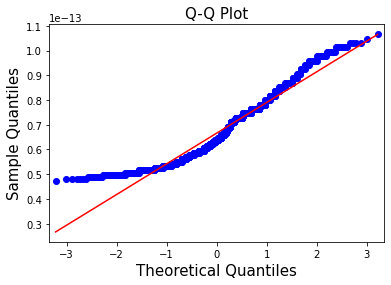

In [121]:
qqplot(mlols.resid, line = 'r')

# set the plot title
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)

# set the x-axis label
# set text size using 'fontsize'
plt.xlabel('Theoretical Quantiles', fontsize = 15)

# set the y-axis label
# set text size using 'fontsize'
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Is it possible to make the residuals normal? If yes, do the needful
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Consider the full model and remove the variables one-by-one to obtain the set of seven most significant variables
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [107]:
# type your code here
linreg_forward = sfs(estimator = legreg, k_features = 7, forward = True, verbose = 2, scoring = 'r2')
sfs_forward = linreg_forward.fit(x_train, y_train)
print('Features selelected using forward selection are: \n',sfs_forward.k_feature_names_)
# print the R-squared value
print('\nR-squared: ', sfs_forward.k_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2021-06-08 08:55:44] Features: 1/7 -- score: 0.9314208034026649[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2021-06-08 08:55:44] Features: 2/7 -- score: 0.9379938430753295[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2021-06-08 08:55:44] Features: 3/7 -- score: 0.9405983473383428[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Features selelected using forward selection are: 
 ('carat', 'table', 'x', 'y', 'z', 'cut', 'color')

R-squared:  0.9417626057799753


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2021-06-08 08:55:44] Features: 4/7 -- score: 0.941119241189822[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2021-06-08 08:55:44] Features: 5/7 -- score: 0.9413768353842832[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2021-06-08 08:55:44] Features: 6/7 -- score: 0.9415322189161535[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 ou

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Identify the colors of a diamond that are not significant while predicting the price?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a regression model on the five features obtained by eliminating the features recursively 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [122]:
# type your code here
# type your code here
linreg_forward = sfs(estimator = legreg, k_features = 5, forward = True, verbose = 2, scoring = 'r2')
sfs_forward = linreg_forward.fit(x_train, y_train)
print('Features selelected using forward selection are: \n',sfs_forward.k_feature_names_)
# print the R-squared value
print('\nR-squared: ', sfs_forward.k_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2021-06-08 09:01:04] Features: 1/5 -- score: 0.9314208034026649[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2021-06-08 09:01:04] Features: 2/5 -- score: 0.9379938430753295[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2021-06-08 09:01:04] Features: 3/5 -- score: 0.9405983473383428[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Features selelected using forward selection are: 
 ('table', 'x', 'z', 'cut', 'color')

R-squared:  0.9413768353842832


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2021-06-08 09:01:04] Features: 4/5 -- score: 0.941119241189822[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2021-06-08 09:01:04] Features: 5/5 -- score: 0.9413768353842832

In [123]:
x.head()

,carat,depth,table,price,x,y,z,cut,color
0,0.30,7.816649,7.810250,5.110296,4.29,2.078461,2.63,1,2
1,0.72,7.874008,7.483315,7.030413,5.80,2.395830,3.58,2,4
2,1.71,7.930952,7.615773,9.698650,7.64,2.753180,4.79,3,6
3,1.01,7.694154,7.681146,9.239260,6.67,2.569047,3.93,3,1
4,0.52,7.918333,7.483315,6.439944,5.17,2.267157,3.23,2,0


In [131]:
x_full=x[['table','x','z','cut','color']]
y_full=x['price']

In [130]:
mlols=sm.OLS(y_full,x_full).fit()
mlols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          8.307e+04
Date:                Tue, 08 Jun 2021   Prob (F-statistic):                        0.00
Time:                        09:06:35   Log-Likelihood:                         -971.03
No. Observations:                1547   AIC:                                      1952.
Df Residuals:                    1542   BIC:                                      1979.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
table         -0.2771      0.009    -31.088      0.000      -0.295      -0.260
x              0.9995      0.082     12.254      0.000       0.840       1.159
z              1.0743      0.132      8.117      0.000       0.815       1.334
cut            0.0271      0.011      2.387      0.017       0.005       0.049
color         -0.1014      0.007    -14.588      0.000      -0.115      -0.088
==============================================================================
Omnibus:                      135.350   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              347.972
Skew:                           0.488   Prob(JB):                     2.75e-76
Kurtosis:                       5.108   Cond. No.                         145.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""